## Downloading the repository

In [1]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2  # updated repository

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004
Receiving objects: 100% (1004/1004), 137.72 MiB | 13.54 MiB/s, done.
Resolving deltas: 100% (588/588), done.


In [2]:
%pwd

'/content'

In [3]:
%cd Mask_RCNN-TF2

/content/Mask_RCNN-TF2


In [4]:
%pwd

'/content/Mask_RCNN-TF2'

In [6]:
%%capture
!pip install -r requirements.txt

In [7]:
%%capture
!python setup.py install

In [8]:
%cd ..

/content


In [9]:
%pwd

'/content'

## Importing the libraries

In [10]:
import os   # to access operational system features
import sys   # to access information regards to system
import cv2   # python library to work with images
import numpy as np # to work with vectors and metrices
import skimage.io   # python library to work with images
from google.colab.patches import cv2_imshow  # to show the images with cv2
import matplotlib.pyplot as plt  # to generate graphs or to show images

In [11]:
# %tensorflow_version 1.x  # run this if your tensor version is 2.x
import tensorflow as tf  # to import tensorflow

In [12]:
tf.__version__   # to check out the version

'2.12.0'

In [13]:
ROOT_DIR = os.path.abspath('./Mask_RCNN-TF2')
ROOT_DIR

'/content/Mask_RCNN-TF2'

In [14]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [15]:
sys.path.append(ROOT_DIR)  # to add all of this files in ( ROOT_DIR) to your system path

In [16]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2']

In [17]:
from mrcnn import utils  # to import the ( utils file) from (mrcnn) directory
from mrcnn import visualize  # to import the ( utils file) from (mrcnn) directory
import mrcnn.model as modellib  # to import the ( model file) from (mrcnn) directory

In [18]:
# https://cocodataset.org/#home
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))  # to add the COCO Datasets to system and it can classify 80 objects ( the join are going to concatenate the both directories)

In [19]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2',
 '/',
 '/content/Mask_RCNN-TF2/samples/coco/']

In [20]:
import coco

In [21]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs') # to concatenate the ( root dir ) with (logs)
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')  # to concatenate the root dir with ( images ) and you can check the image directory NOW

In [22]:
MODEL_DIR, IMAGE_DIR  # to print the location of both variables

('/content/Mask_RCNN-TF2/logs', '/content/Mask_RCNN-TF2/images')

### [ ! ] Compatibility Update
Run the 5 lines below so we don't have any issues when running with the latest versions of Tensorflow

In [23]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Loading the pre-trained neural network

In [24]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')  # h5 is a file contained a trained neural network with tensorflow

In [25]:
utils.download_trained_weights(COCO_MODEL_PATH)  # to download the pre-trained model

... done downloading pretrained model!


In [26]:
class InferenceConfig(coco.CocoConfig):  # check the GPU ACTIVATION
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1  # similar to batch size ( like 10 images and update , and so on)

In [27]:
config = InferenceConfig()

In [28]:
config.display()  # all the information about the neural network


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [29]:
MODEL_DIR

'/content/Mask_RCNN-TF2/logs'

In [30]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)  # inference means we are not going to train the model but we just goin to get the predictions

Instructions for updating:
Use fn_output_signature instead


In [31]:
network.load_weights(COCO_MODEL_PATH, by_name=True)  # to load the weights from COCO

## Detecting objects

In [32]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [33]:
len(class_names)  # to print the number of objects that COCO can detect

81

In [34]:
class_names[1]

'person'

In [35]:
class_names[1], class_names.index('person')

('person', 1)

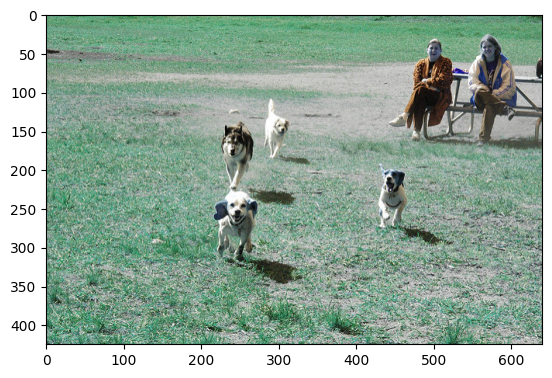

In [36]:
image2 = cv2.imread('/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg')
plt.imshow(image2); # BGR

In [37]:
image = skimage.io.imread('/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg') # RGB

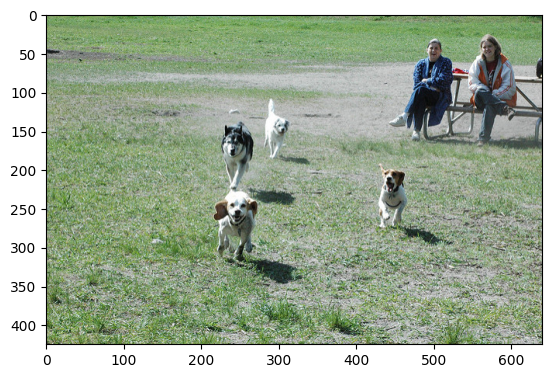

In [38]:
plt.imshow(image);

In [39]:
results = network.detect([image], verbose=0)  # to add the prediction of your model to ( results ) variable
results  # to print the detected objects that your model predicted

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[{'rois': array([[195, 426, 277, 467],
         [226, 216, 321, 273],
         [106, 280, 189, 314],
         [ 32, 445, 159, 527],
         [136, 225, 231, 268],
         [ 27, 541, 168, 607],
         [ 75, 476, 164, 634]], dtype=int32),
  'class_ids': array([17, 17, 17,  1, 17,  1, 14], dtype=int32),
  'scores': array([0.9997004 , 0.9996582 , 0.9996049 , 0.99913245, 0.99799263,
         0.997436  , 0.9165011 ], dtype=float32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
       

In [40]:
class_names[17], class_names[1], class_names[14]  # to print the name of detected objects

('dog', 'person', 'bench')

In [41]:
r = results[0]

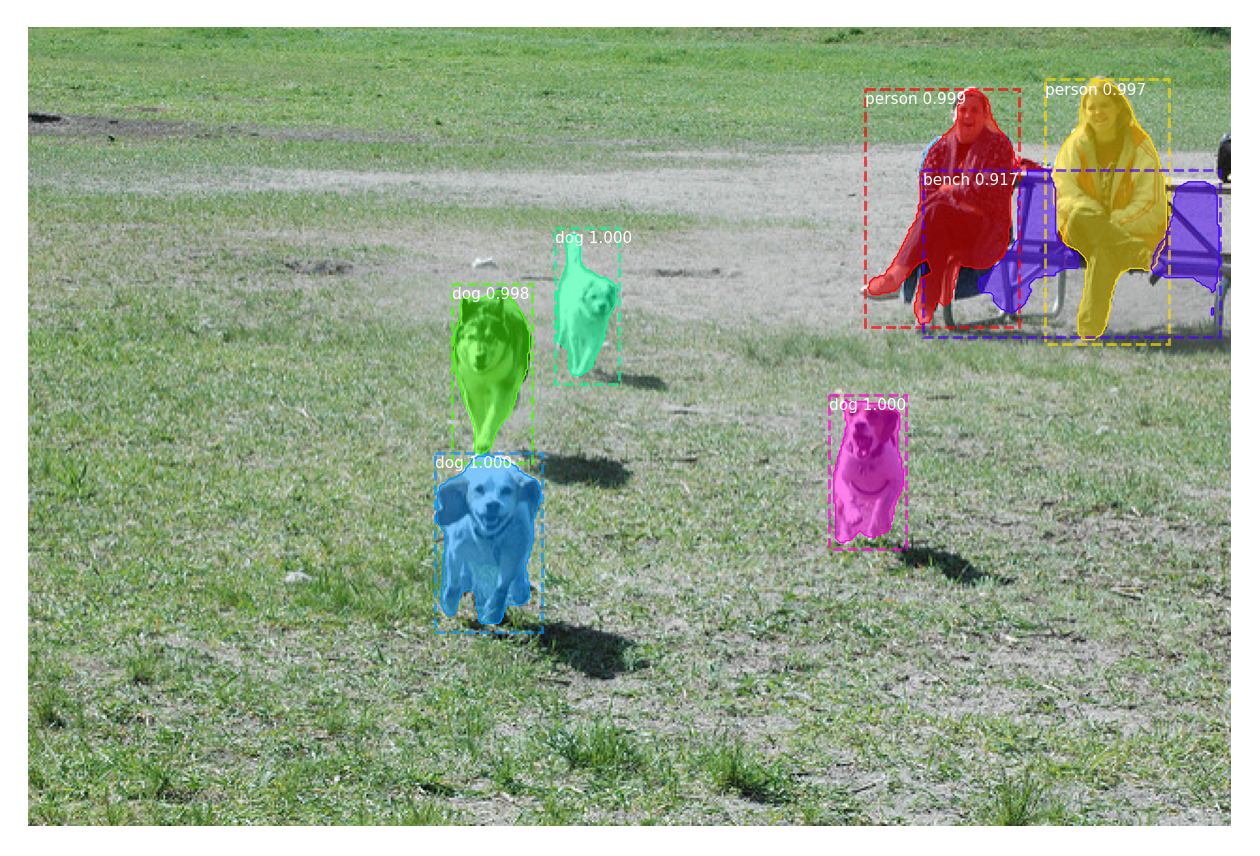

In [42]:
visualize.display_instances(image, r['rois'], r['masks'],   # to get the results of detected objects with segmentation
                            r['class_ids'], class_names, r['scores'])